In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_train = pd.read_table('../Data/Kaggle/Mercari/train.tsv', delimiter='\t', engine='python', 
                         dtype={'category_name': 'category', 'brand_name': 'category', 'name': str, 'item_description': str})
df_test = pd.read_table('../Data/Kaggle/Mercari/test.tsv', delimiter='\t', engine='python',
                        dtype={'category_name': 'category', 'brand_name': 'category', 'name': str, 'item_description': str})

In [3]:
df_train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home DÃ©cor/Home DÃ©cor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null category
brand_name           849853 non-null category
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482535 non-null object
dtypes: category(2), float64(1), int64(3), object(2)
memory usage: 73.8+ MB


### Handling Missing Values

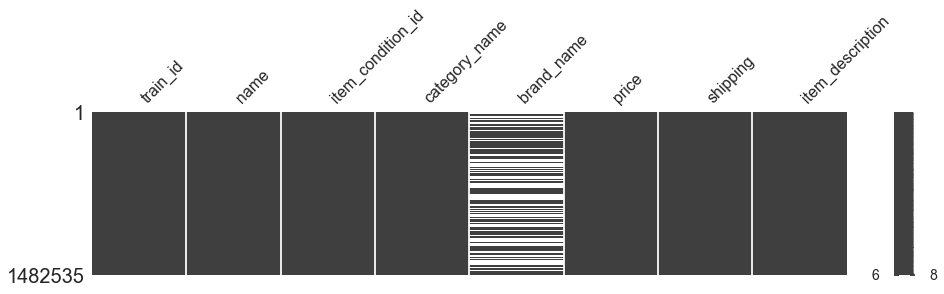

In [5]:
import missingno as msno

msno.matrix(df_train, figsize=(15, 3))

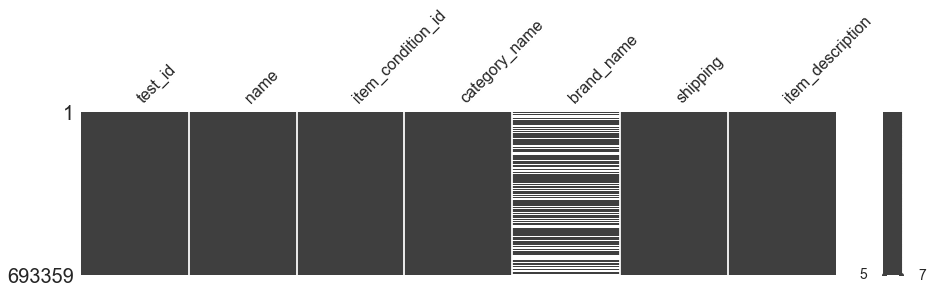

In [6]:
msno.matrix(df_test, figsize=(15, 3))

In [7]:
categorical =  df_train.select_dtypes(['category']).columns
for df in [df_train, df_test]:
    for col in categorical:
        df[col] = df[col].cat.add_categories(['missing']).fillna('missing')

### Handling Categorical Data

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
df_both = pd.concat([df_train, df_test])
le = LabelEncoder()

for cat in categorical:
    print(cat)
    le = le.fit(df_both[cat])
    for df in [df_train, df_test]:
        df[cat] = le.transform(df[cat])
    print(le.classes_)
    print(le.transform(le.classes_))

category_name
['Beauty/Bath & Body/Bath' 'Beauty/Bath & Body/Bathing Accessories'
 'Beauty/Bath & Body/Cleansers' ..., "Women/Women's Handbags/Shoulder Bag"
 "Women/Women's Handbags/Totes & Shoppers" 'missing']
[   0    1    2 ..., 1308 1309 1310]
brand_name
['!iT Jeans' '% Pure' '10.Deep' ..., 'trÃ¨StiQue' 'vineyard vines' 'wallis']
[   0    1    2 ..., 5287 5288 5289]


In [10]:
df_train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,829,5265,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,86,3889,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,1277,4588,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,503,5265,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,1204,5265,44.0,0,Complete with certificate of authenticity


### Text to Sequence

In [11]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [12]:
raw_text = np.hstack([df_train['item_description'].str.lower(), df_train['name'].str.lower()])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(raw_text)

for df in [df_train, df_test]:
    df['seq_item_description'] = tokenizer.texts_to_sequences(df['item_description'].str.lower())
    df['seq_name'] = tokenizer.texts_to_sequences(df['name'].str.lower())

In [13]:
df_train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,seq_item_description,seq_name
0,0,MLB Cincinnati Reds T Shirt Size XL,3,829,5265,10.0,1,No description yet,"[12, 68, 79]","[3851, 8822, 6896, 208, 84, 6, 155]"
1,1,Razer BlackWidow Chroma Keyboard,3,86,3889,52.0,0,This keyboard is in great condition and works ...,"[29, 2627, 10, 7, 39, 17, 1, 207, 51, 19, 1113...","[10759, 25572, 16366, 2627]"
2,2,AVA-VIV Blouse,1,1277,4588,10.0,1,Adorable top with a hint of lace and a key hol...,"[604, 60, 9, 4, 5347, 11, 192, 1, 4, 886, 1290...","[7634, 10563, 666]"
3,3,Leather Horse Statues,1,503,5265,35.0,1,New with tags. Leather horses. Retail for [rm]...,"[5, 9, 61, 178, 6527, 230, 3, 21, 166, 1085, 2...","[178, 2610, 14246]"
4,4,24K GOLD plated rose,1,1204,5265,44.0,0,Complete with certificate of authenticity,"[807, 9, 6888, 11, 1997]","[4884, 104, 1032, 280]"


### Exploratory Analysis

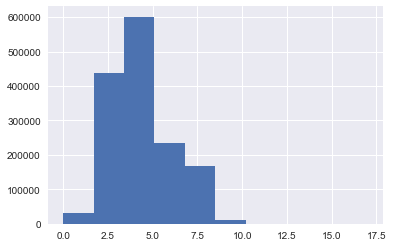

In [14]:
df_train['seq_name'].apply(lambda x: len(x)).hist()

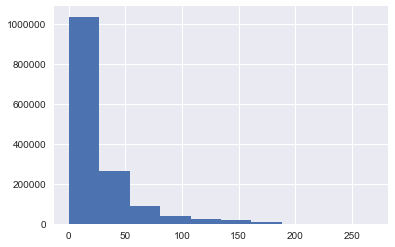

In [15]:
df_train['seq_item_description'].apply(lambda x: len(x)).hist()

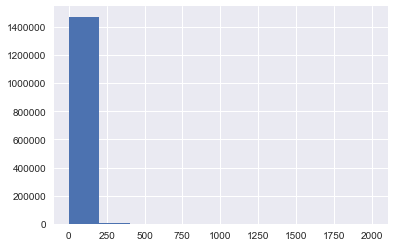

In [16]:
df_train['price'].hist()

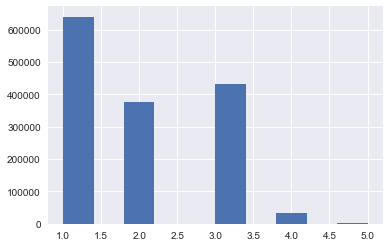

In [17]:
df_train['item_condition_id'].hist()

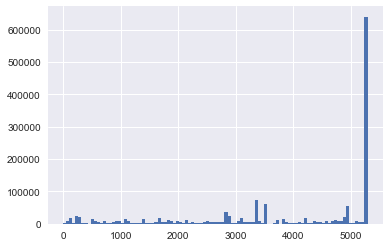

In [18]:
df_train['brand_name'].hist(bins=100)

### Modeling

In [19]:
MAX_NAME_SEQ = df_train['seq_name'].apply(lambda x: len(x)).mean() + \
               df_train['seq_name'].apply(lambda x: len(x)).std()  * 2
    
MAX_ITEM_DESC_SEQ = df_train['seq_item_description'].apply(lambda x: len(x)).mean() + \
                    df_train['seq_item_description'].apply(lambda x: len(x)).std()  * 2
    
MAX_CATEGORY = max(df_train['category_name'].max(), df_test['category_name'].max())+1
    
MAX_BRAND = max(df_train['brand_name'].max(), df_test['brand_name'].max())+1

MAX_CONDITION = max(df_train['item_condition_id'].max(), df_test['item_condition_id'].max())+1

In [20]:
MAX_TEXT = len(tokenizer.word_index)+1

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [22]:
df_train['price'] = np.log(df_train['price']+1)
scaler = MinMaxScaler(feature_range=(-1, 1))
df_train['price'] = scaler.fit_transform(df_train['price'].values.reshape(-1, 1))

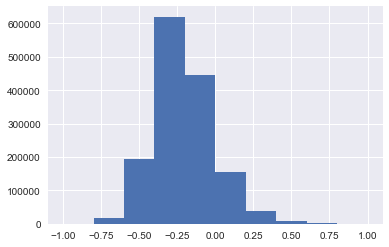

In [23]:
df_train['price'].hist()

In [24]:
X_train = df_train.drop(['price'], axis=1).copy()
y_train = df_train['price'].copy()
X_valid = df_test.copy()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_train.copy(), y_train.copy(), test_size=0.2, random_state=0)

In [26]:
import keras 
from IPython.display import clear_output

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [27]:
from keras import backend as K

In [28]:
def rmsle(y_true, y_pred):
    first_log  = K.log(K.clip(y_pred, K.epsilon(), None) + 1.)
    second_log = K.log(K.clip(y_true, K.epsilon(), None) + 1.)
    return K.sqrt(K.mean(K.square(first_log - second_log), axis=-1))

In [29]:
from keras.preprocessing.sequence import pad_sequences

In [30]:
def get_keras_data(dataset):
    X = {
        'name': pad_sequences(dataset['seq_name'], maxlen=round(MAX_NAME_SEQ)),
        'item_desc': pad_sequences(dataset['seq_item_description'], maxlen=round(MAX_ITEM_DESC_SEQ)),
        'brand_name': np.array(dataset['brand_name']),
        'category_name': np.array(dataset['category_name']),
        'item_condition': np.array(dataset['item_condition_id']),
        'shipping': np.array(dataset['shipping'])
    }
    return X

X_train = get_keras_data(X_train)
X_test  = get_keras_data(X_test)
X_valid = get_keras_data(X_valid)

In [31]:
from keras.layers import Input, Dropout, Dense, Activation, concatenate, GRU, Embedding, Flatten, LSTM
from keras.models import Model
from keras.callbacks import Callback

In [32]:
def get_model():
    dr_r = 0.2
    
    # Inputs
    name = Input(shape=[X_train['name'].shape[1]], name='name')
    item_desc = Input(shape=[X_train['item_desc'].shape[1]], name='item_desc')
    brand_name = Input(shape=[1], name='brand_name')
    category_name = Input(shape=[1], name='category_name')
    item_condition = Input(shape=[1], name='item_condition')
    shipping = Input(shape=[1], name='shipping')
    
    # Embeddings layers
    emb_name = Embedding(MAX_TEXT, 50) (name)
    emb_item_desc = Embedding(MAX_TEXT, 50) (item_desc)
    emb_brand_name = Embedding(MAX_BRAND, 10) (brand_name)
    emb_category_name = Embedding(MAX_CATEGORY, 10) (category_name)
    emb_item_condition = Embedding(MAX_CONDITION, 5) (item_condition)
    
    # RNN layer
    rnn_layer1 = LSTM(16) (emb_item_desc)
    rnn_layer2 = LSTM(8) (emb_name)
    
    #main layer
    main_l = concatenate([
        Flatten() (emb_brand_name),
        Flatten() (emb_category_name),
        Flatten() (emb_item_condition),
        rnn_layer1,
        rnn_layer2,
        shipping
    ])
    
    main_l = Dropout(dr_r) (Dense(128) (main_l))
    main_l = Dropout(dr_r) (Dense(64) (main_l))
    
    # Output
    output = Dense(1, activation='linear') (main_l)
    
    # Model
    model = Model([name, item_desc, brand_name, category_name, item_condition, shipping], output)
    model.compile(loss='mse', optimizer='adam', metrics=[rmsle])
    
    return model

In [33]:
model = get_model()
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
brand_name (InputLayer)          (None, 1)             0                                            
____________________________________________________________________________________________________
category_name (InputLayer)       (None, 1)             0                                            
____________________________________________________________________________________________________
item_condition (InputLayer)      (None, 1)             0                                            
____________________________________________________________________________________________________
item_desc (InputLayer)           (None, 87)            0                                            
___________________________________________________________________________________________

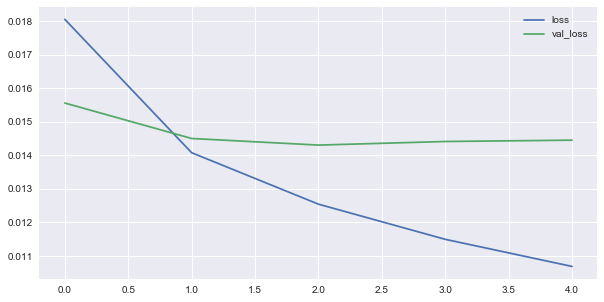

1186028/1186028 [==============================] - 272s - loss: 0.0107 - rmsle: 0.0102 - val_loss: 0.0144 - val_rmsle: 0.0118


In [34]:
BATCH_SIZE = 1000
epochs = 5

model = get_model()
model.fit(X_train, y_train, epochs=epochs, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), 
          verbose=1, callbacks=[plot_losses])

In [35]:
preds = model.predict(X_valid, batch_size=BATCH_SIZE)
preds = scaler.inverse_transform(preds)
preds = np.exp(preds)-1

submission = df_test[['test_id']].copy()
submission['price'] = preds

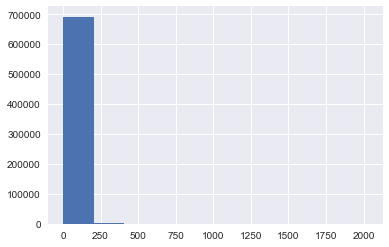

In [36]:
submission.to_csv('mercari.csv', index=False)
submission['price'].hist()